In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [26]:
df=pd.read_csv("cleaned.csv")

In [27]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,5,3,36,327,1,2,3,3,4,...,0,3,4,4,0,1,2,8,4,208500
1,1,0,3,51,498,1,2,3,3,2,...,0,3,4,4,0,4,1,8,4,181500
2,2,5,3,39,702,1,2,0,3,4,...,0,3,4,4,0,8,2,8,4,223500
3,3,6,3,31,489,1,2,0,3,0,...,0,3,4,4,0,1,0,8,0,140000
4,4,5,3,55,925,1,2,0,3,2,...,0,3,4,4,0,11,2,8,4,250000


In [28]:
Y=df["SalePrice"]

In [29]:
df.drop(columns="SalePrice",inplace=True)

In [30]:
Y=pd.DataFrame(Y)

In [31]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [32]:
df=pd.DataFrame(df)

In [33]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,5,3,36,327,1,2,3,3,4,...,0,0,3,4,4,0,1,2,8,4
1,1,0,3,51,498,1,2,3,3,2,...,0,0,3,4,4,0,4,1,8,4
2,2,5,3,39,702,1,2,0,3,4,...,0,0,3,4,4,0,8,2,8,4
3,3,6,3,31,489,1,2,0,3,0,...,0,0,3,4,4,0,1,0,8,0
4,4,5,3,55,925,1,2,0,3,2,...,0,0,3,4,4,0,11,2,8,4


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int64
 3   LotFrontage    1460 non-null   int64
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   int64
 6   Alley          1460 non-null   int64
 7   LotShape       1460 non-null   int64
 8   LandContour    1460 non-null   int64
 9   LotConfig      1460 non-null   int64
 10  LandSlope      1460 non-null   int64
 11  Neighborhood   1460 non-null   int64
 12  Condition1     1460 non-null   int64
 13  Condition2     1460 non-null   int64
 14  BldgType       1460 non-null   int64
 15  HouseStyle     1460 non-null   int64
 16  OverallQual    1460 non-null   int64
 17  OverallCond    1460 non-null   int64
 18  YearBuilt      1460 non-null   int64
 19  YearRe

In [35]:
model=LinearRegression()

In [36]:
scaler=MinMaxScaler()

In [37]:
poly=PolynomialFeatures(degree=2)
new_df=poly.fit_transform(df)


In [38]:
new_df.shape

(1460, 3240)

In [46]:
X=scaler.fit_transform(new_df)
Y=scaler.fit_transform(Y)

In [48]:
Y[0]

array([0.24107763])

In [59]:
model.fit(X,Y)

LinearRegression()

In [60]:
Y_pre=model.predict(X)

In [61]:
Y_pre = scaler.inverse_transform(Y_pre)

In [62]:
mse=mean_squared_error(Y,Y_pre)

In [63]:
r2=r2_score(Y,Y_pre)

In [64]:
print("\nMean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)



Mean Squared Error (MSE): 39039176817.33723
R-squared (R2) Score: -3209800204969.706


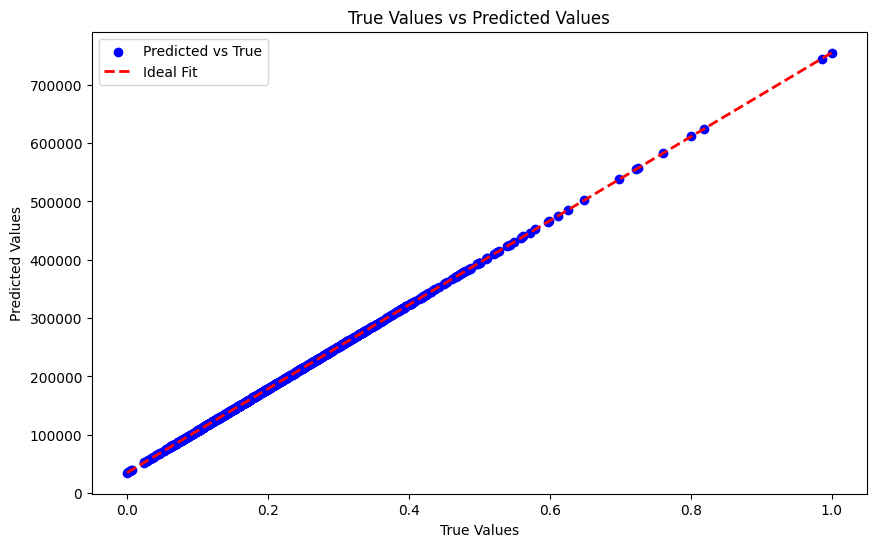

In [57]:

# Visualize True vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y, Y_pre, color='blue', label='Predicted vs True')
plt.plot([min(Y), max(Y)], [min(Y_pre), max(Y_pre)], color='red', linewidth=2, linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.legend()
plt.show()
